# A/B Testing project

# Table of contents  
1.[Introduction](#intro)  
2.[Steps](#steps)  
3.[Data preprocessing](#data)    
4.[Exploratory Data Analysis](#eda)  
5.[A/B test result analysis](#ab)  
5.[Final Conclusion](#end)  


<a id='intro'>

## Introduction  
   <b>This project is an analytical task from an international online store. Your predecessor failed to complete an A/B test they launched and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results..  
    We have to see if the A/B test data taken according to the technical requirements and analyse the result to see if any  
improvement from the newly introduced feature.
</b>

<a id='steps'>

## Steps
<b>1.Data Preprocessing   
2.Exploratory Data Analysis  
3.Preparing data based on technical description  
4.A/b test result analysis  
5.Conclusion

In [115]:
#importing all the necessary package
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth


<b>Downloading all the datasets.

In [116]:
marketing_events_df=pd.read_csv('ab_project_marketing_events_us.csv')
marketing_events_df.head()

,Unnamed: 0,name,regions,start_dt,finish_dt
0,0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [117]:
ab_new_users_df=pd.read_csv('final_ab_new_users_upd_us.csv')
ab_new_users_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
1,1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
4,4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [118]:
ab_new_events_df=pd.read_csv('final_ab_events_upd_us.csv')
ab_new_events_df.head()

,Unnamed: 0,user_id,event_dt,event_name,details
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [119]:
ab_new_participants_df=pd.read_csv('final_ab_participants_upd_us.csv')
ab_new_participants_df.head()

,Unnamed: 0,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,2,DABC14FDDFADD29E,A,recommender_system_test
3,3,04988C5DF189632E,A,recommender_system_test
4,4,4FF2998A348C484F,A,recommender_system_test


<a id='data'>

## Data Preprocessing

<b>Getting the details of each dataset

In [120]:
marketing_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     int64 
 1   name        14 non-null     object
 2   regions     14 non-null     object
 3   start_dt    14 non-null     object
 4   finish_dt   14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [121]:
ab_new_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  58703 non-null  int64 
 1   user_id     58703 non-null  object
 2   first_date  58703 non-null  object
 3   region      58703 non-null  object
 4   device      58703 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [122]:
ab_new_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  423761 non-null  int64  
 1   user_id     423761 non-null  object 
 2   event_dt    423761 non-null  object 
 3   event_name  423761 non-null  object 
 4   details     60314 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.2+ MB


In [123]:
ab_new_participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14525 non-null  int64 
 1   user_id     14525 non-null  object
 2   group       14525 non-null  object
 3   ab_test     14525 non-null  object
dtypes: int64(1), object(3)
memory usage: 454.0+ KB


<b>Missing values and Duplicate values

<b>ab_new_events_df has significant amount of missing values. Analysing the same for filling   
 missing values.

In [124]:
ab_new_events_df.head(10)

,Unnamed: 0,user_id,event_dt,event_name,details
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [125]:
ab_new_events_df.duplicated().sum()

0

In [126]:
ab_new_events_df['user_id'].value_counts()

A3917F81482141F2    36
8AEB716C4CD82CA7    32
426330B820B8711A    32
BA87FD8D70D63CC6    32
11285A53EC2B2042    32
                    ..
DE755BE0D83CF729     1
5F55C1716703C6D0     1
756910FEB8E6E104     1
14A28942B782F678     1
031060788BD3E254     1
Name: user_id, Length: 58703, dtype: int64

<b> There are 58703 unique users .More than 1 event associated with each user.

In [127]:
ab_new_events_df['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

<b>From the above analysis , we see that details are available only for purchase(price) .Since all  
other events do not have price , will fill the missing values  with 0.

In [128]:
ab_new_events_df=ab_new_events_df.fillna(0)
ab_new_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  423761 non-null  int64  
 1   user_id     423761 non-null  object 
 2   event_dt    423761 non-null  object 
 3   event_name  423761 non-null  object 
 4   details     423761 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.2+ MB


<b>Checking for the duplicates.

In [129]:
marketing_events_df.duplicated().sum()

0

In [130]:
ab_new_users_df.duplicated().sum()

0

In [131]:
ab_new_events_df.duplicated().sum()

0

In [132]:
ab_new_participants_df.duplicated().sum()

0

<a id='eda'>

<b>We don't see any duplicates in the given data.

***Intermediate Conclusion***  
 <b> Analysing all the available datasets and preprocessing , our dataset is free from missing values 
  and duplicates.

## Exploratory Data Analysis

In [133]:
ab_new_events_df.head()

,Unnamed: 0,user_id,event_dt,event_name,details
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [134]:
#adding a new date column
ab_new_events_df['event_date'] = pd.to_datetime(ab_new_events_df['event_dt']).dt.date

In [135]:
ab_new_events_df.head()

,Unnamed: 0,user_id,event_dt,event_name,details,event_date
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07


In [136]:
ab_new_events_df['event_date']

0         2020-12-07
1         2020-12-07
2         2020-12-07
3         2020-12-07
4         2020-12-07
             ...    
423756    2020-12-30
423757    2020-12-30
423758    2020-12-30
423759    2020-12-30
423760    2020-12-30
Name: event_date, Length: 423761, dtype: object

<b>We have user events from 7th Dec to 30th Dec2020.

In [137]:
ab_new_users_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
1,1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
4,4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


### Preparing data based on technical description

In [138]:
# number of events distributed among each user
users = ab_new_events_df.pivot_table(
    index=('user_id','event_date'), 
    columns='event_name', 
    values='event_dt',
    aggfunc='min').reset_index().rename_axis(index=None, columns=None)
users.head()

,user_id,event_date,login,product_cart,product_page,purchase
0,0001710F4DDB1D1B,2020-12-14,2020-12-14 20:20:40,2020-12-14 20:20:42,2020-12-14 20:20:41,NaN
1,0001710F4DDB1D1B,2020-12-15,2020-12-15 17:34:22,2020-12-15 17:34:25,2020-12-15 17:34:23,NaN
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35


In [139]:
users.index.name=None
new_cols=['user_id','event_date','login','product_page','product_cart','purchase']
users=users[new_cols]

In [140]:
users.head()

,user_id,event_date,login,product_page,product_cart,purchase
0,0001710F4DDB1D1B,2020-12-14,2020-12-14 20:20:40,2020-12-14 20:20:41,2020-12-14 20:20:42,NaN
1,0001710F4DDB1D1B,2020-12-15,2020-12-15 17:34:22,2020-12-15 17:34:23,2020-12-15 17:34:25,NaN
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35,2020-12-20 06:36:35


In [141]:
ab_new_users_df['first_date'].value_counts()

2020-12-21    6077
2020-12-14    5448
2020-12-07    5291
2020-12-13    4181
2020-12-20    4140
2020-12-12    3591
2020-12-19    3480
2020-12-18    3238
2020-12-22    3083
2020-12-08    3017
2020-12-17    2940
2020-12-15    2924
2020-12-10    2784
2020-12-11    2226
2020-12-23    2180
2020-12-16    2093
2020-12-09    2010
Name: first_date, dtype: int64

<b>We see around 3083  new users on Dec22 and also some on Dec23.  
Since new users after 21st Dec are stopped , we will filter those data.

#### filtering new user sign up after 21st Dec 2020

In [142]:
#filtering new users till 21dec2020
ab_new_users_df=ab_new_users_df[ab_new_users_df['first_date'] < '2020-12-22']
ab_new_users_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
1,1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
4,4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


#### Filtering first 14 days of signing up

In [143]:
ab_new_users_df['first_date'].value_counts()

2020-12-21    6077
2020-12-14    5448
2020-12-07    5291
2020-12-13    4181
2020-12-20    4140
2020-12-12    3591
2020-12-19    3480
2020-12-18    3238
2020-12-08    3017
2020-12-17    2940
2020-12-15    2924
2020-12-10    2784
2020-12-11    2226
2020-12-16    2093
2020-12-09    2010
Name: first_date, dtype: int64

In [144]:
#merge users with new_users_df to get first_date
users=pd.merge(users,ab_new_users_df,on='user_id')
users.head()

,user_id,event_date,login,product_page,product_cart,purchase,Unnamed: 0,first_date,region,device
0,0001710F4DDB1D1B,2020-12-14,2020-12-14 20:20:40,2020-12-14 20:20:41,2020-12-14 20:20:42,NaN,7000,2020-12-14,EU,Android
1,0001710F4DDB1D1B,2020-12-15,2020-12-15 17:34:22,2020-12-15 17:34:23,2020-12-15 17:34:25,NaN,7000,2020-12-14,EU,Android
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,8918,2020-12-14,EU,Android
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,8918,2020-12-14,EU,Android
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35,2020-12-20 06:36:35,8918,2020-12-14,EU,Android


In [145]:
users.duplicated().sum()

0

In [146]:
#converting 'first_date' from object to date 
users['first_date']=pd.to_datetime(users['first_date']).dt.date

In [147]:
#calculating number of days since sign up
users['days']=(users['event_date']-users['first_date'])/np.timedelta64(1, 'D')
users['days']=users['days'].round().astype('int')
users.head()

,user_id,event_date,login,product_page,product_cart,purchase,Unnamed: 0,first_date,region,device,days
0,0001710F4DDB1D1B,2020-12-14,2020-12-14 20:20:40,2020-12-14 20:20:41,2020-12-14 20:20:42,NaN,7000,2020-12-14,EU,Android,0
1,0001710F4DDB1D1B,2020-12-15,2020-12-15 17:34:22,2020-12-15 17:34:23,2020-12-15 17:34:25,NaN,7000,2020-12-14,EU,Android,1
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,8918,2020-12-14,EU,Android,0
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,8918,2020-12-14,EU,Android,1
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35,2020-12-20 06:36:35,8918,2020-12-14,EU,Android,6


In [148]:
users['days'].value_counts()

0     53180
1     26521
2     17750
3     13111
4      9348
5      8144
6      7177
7      6073
8      5609
9      4605
10     3583
11     2771
12     2458
13     2094
14     1911
15     1591
16     1128
17      889
19      624
18      505
20      479
21      357
22      226
23       36
Name: days, dtype: int64

In [149]:
users['event_date'].value_counts()

2020-12-21    14044
2020-12-20    11366
2020-12-14    11254
2020-12-19    10427
2020-12-15    10083
2020-12-18     9883
2020-12-22     9589
2020-12-17     9360
2020-12-13     9020
2020-12-16     9004
2020-12-12     7562
2020-12-23     7492
2020-12-24     6242
2020-12-10     6045
2020-12-11     6000
2020-12-08     5496
2020-12-09     5227
2020-12-07     5031
2020-12-26     4884
2020-12-27     4404
2020-12-28     4033
2020-12-29     3688
2020-12-30       36
Name: event_date, dtype: int64

In [150]:
users['first_date'].value_counts()

2020-12-07    18841
2020-12-14    18110
2020-12-21    16161
2020-12-13    13917
2020-12-12    12140
2020-12-20    11342
2020-12-08    10712
2020-12-19     9993
2020-12-10     9728
2020-12-18     9536
2020-12-15     9392
2020-12-17     8951
2020-12-11     7683
2020-12-09     7152
2020-12-16     6512
Name: first_date, dtype: int64

In [151]:
#filtering records within 14 days of signup
users=users[users['days']<15]
users.head()

,user_id,event_date,login,product_page,product_cart,purchase,Unnamed: 0,first_date,region,device,days
0,0001710F4DDB1D1B,2020-12-14,2020-12-14 20:20:40,2020-12-14 20:20:41,2020-12-14 20:20:42,NaN,7000,2020-12-14,EU,Android,0
1,0001710F4DDB1D1B,2020-12-15,2020-12-15 17:34:22,2020-12-15 17:34:23,2020-12-15 17:34:25,NaN,7000,2020-12-14,EU,Android,1
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,8918,2020-12-14,EU,Android,0
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,8918,2020-12-14,EU,Android,1
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35,2020-12-20 06:36:35,8918,2020-12-14,EU,Android,6


In [152]:
users.duplicated().sum()

0

In [153]:
#User pattern stage by stage in the event funnel
step_1 = ~users['login'].isna()
step_2 = step_1 & (users['product_page'] > users['login'])
step_3 = step_2& (users['product_cart'] > users['product_page'])
step_4 = step_3 & (users['purchase'] > users['product_cart'])

n_login=users[step_1].shape[0]
n_product_page = users[step_2].shape[0]
n_product_cart = users[step_3].shape[0]
n_purchase = users[step_4].shape[0]

print('Number of users visiting logged in:', n_login)
print('Number of users visiting product page:', n_product_page)
print('number of users adding product to cart:', n_product_cart)
print('number of users Purchasing:', n_purchase) 

Number of users visiting logged in: 164167
Number of users visiting product page: 61748
number of users adding product to cart: 3732
number of users Purchasing: 0


<b>Overall Conversion rate

In [154]:
login_product_conversion = (n_product_page / n_login)*100
login_product_conversion


37.61291855244964

In [155]:
product_cart_conversion = (n_product_cart / n_product_page)*100
product_cart_conversion


6.043920450864805

In [156]:
cart_purchase_conversion=(n_purchase/n_product_cart)*100
cart_purchase_conversion

0.0

<b> Based on the event funnel , we see very low conversion to 'purchase'in the sequence   
    'product_page → product_card → purchase'    
    
  <b>  So , will proceed to see if any other pattern visible with our data.

In [157]:
users['login'].value_counts()

2020-12-20 09:02:36    4
2020-12-14 12:55:20    4
2020-12-13 20:18:52    4
2020-12-14 17:42:31    4
2020-12-14 12:54:16    4
                      ..
2020-12-20 16:22:38    1
2020-12-13 19:26:46    1
2020-12-08 23:15:23    1
2020-12-14 09:06:36    1
2020-12-21 01:46:44    1
Name: login, Length: 156329, dtype: int64

#### detecting user pattern in making purchase

In [158]:
#filtering users making purchase to detect any pattern
users[~users['purchase'].isna()].head()

,user_id,event_date,login,product_page,product_cart,purchase,Unnamed: 0,first_date,region,device,days
2,000199F1887AE5E6,2020-12-14,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,8918,2020-12-14,EU,Android,0
3,000199F1887AE5E6,2020-12-15,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,2020-12-15 07:22:56,8918,2020-12-14,EU,Android,1
4,000199F1887AE5E6,2020-12-20,2020-12-20 06:36:35,2020-12-20 06:36:36,2020-12-20 06:36:35,2020-12-20 06:36:35,8918,2020-12-14,EU,Android,6
5,000199F1887AE5E6,2020-12-21,2020-12-21 02:11:23,2020-12-21 02:11:24,2020-12-21 02:11:24,2020-12-21 02:11:23,8918,2020-12-14,EU,Android,7
22,000921BDA987CB74,2020-12-07,2020-12-07 08:03:38,2020-12-07 08:03:39,NaN,2020-12-07 08:03:38,2937,2020-12-07,EU,Android,0


<b>Analysing the above records , we see many instances of purchase right after logging in.

In [159]:
#Analysing the purchase conversion in this new sequence (login → purchase)
step_1 = ~users['login'].isna()
step_2 = step_1 & (users['purchase'] >=users['login'])

In [160]:
n_login=users[step_1].shape[0]
n_purchase = users[step_2].shape[0]

In [161]:
print('Number of users visiting logged in:', n_login)
print('Number of users in purchase page:', n_purchase)

Number of users visiting logged in: 164167
Number of users in purchase page: 54107


In [162]:
login_purchase_conversion = n_purchase / n_login
login_purchase_conversion

0.3295851175936699

<b>Around 33% of users who logged in go directly with 'purchase'.Let's continue with A/B test group to study the same.

####  Testing for Number of users in both the A/B groups

In [163]:
#test group participating in  'recommender_system_test'
recommender_participants_df=ab_new_participants_df[ab_new_participants_df['ab_test']=='recommender_system_test'].sort_values(by='group')

In [164]:
ab_new_participants_df.duplicated().sum()

0

In [165]:
#total number of participants in group A and group B
n_groupA=len(ab_new_participants_df[((ab_new_participants_df['group']=='A')  & (ab_new_participants_df['ab_test']=='recommender_system_test'))])
n_groupB=3675-n_groupA

In [166]:
#number of participants in each group
n_groupA

2747

In [167]:
n_groupB

928

In [168]:
recommender_participants_df.head()

,Unnamed: 0,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
2270,2270,8B8BEF27A788DCA7,A,recommender_system_test
2271,2271,C1165CDA449AC6BC,A,recommender_system_test
2272,2272,EA13A8207E2AEC0C,A,recommender_system_test
2273,2273,19723E02ECBEA4B8,A,recommender_system_test


In [169]:
recommender_participants_df['user_id'].nunique()

3675

<b>None of the users in both A and B group.  
   We see significant difference in users participating in each of the 2 groups.. 

####  calculating 15% of new users in EU as test audience

In [170]:
ab_new_users_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
1,1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
4,4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [171]:
ab_new_users_df.duplicated().sum()

0

In [172]:
#filtering new users in EU region
ab_new_users_df[ab_new_users_df['region']=='EU'].head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
7,7,8942E64218C9A1ED,2020-12-07,EU,PC
9,9,FFCEA1179C253104,2020-12-07,EU,Android


In [173]:
#total number of new users in EU region
new_users_EU =len(ab_new_users_df[ab_new_users_df['region']=='EU'])
new_users_EU

39466

In [174]:
#15% of EU new users as audience
n_audience = 0.15*new_users_EU
n_audience

5919.9

<b>Given that  15% of the new users from the EU region are the test audience which is roughly  
around 6000.

<b>Looking for any marketing promo during the test period.

In [175]:
marketing_events_df

,Unnamed: 0,name,regions,start_dt,finish_dt
0,0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<b>There are 2 marketing promos.  
1.Christmas & New Year Promo  in EU,N.America from 25th Dec2020 to 3rd Jan 2021.  
2.CIS New Year Gift Lottery  in CIS from Dec 30,2020 to Jan 7 ,2021 

####  calculate the share of new users from the EU region within the recommender_system_test test.

In [176]:
#filtering A/B test participants details for recommender_system_test
ab_new_participants_df=ab_new_participants_df[ab_new_participants_df['ab_test']=='recommender_system_test']
ab_new_participants_df.head()

,Unnamed: 0,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,2,DABC14FDDFADD29E,A,recommender_system_test
3,3,04988C5DF189632E,A,recommender_system_test
4,4,4FF2998A348C484F,A,recommender_system_test


In [177]:
#Total number of users in A/B test group
len(ab_new_participants_df)

3675

In [178]:
#Total number of users in A/B test group A
len(ab_new_participants_df[ab_new_participants_df['group']=='A'])

2747

In [179]:
#Total number of users in A/B test group B
len(ab_new_participants_df[ab_new_participants_df['group']=='B'])

928

In [180]:
#getting a list of user id in the A/B test group 
user_list=ab_new_participants_df['user_id'].tolist()
user_list

['D1ABA3E2887B6A73',
 'A7A3664BD6242119',
 'DABC14FDDFADD29E',
 '04988C5DF189632E',
 '4FF2998A348C484F',
 '7473E0943673C09E',
 'C46FE336D240A054',
 '92CB588012C10D3D',
 'B3A2485649E4A012',
 '66FC298441D50783',
 'CD74C3D22FFC09C2',
 '19F4A16B875E04EE',
 '80A2F277C571443C',
 '50AA023EF325BCA1',
 'C716AF018B3D96F5',
 'EAFB9027A27D510C',
 '5C374D874B09B2D9',
 '5D5E6EE92AF6E9E0',
 '8DD7CC271D8CD039',
 '0F1FF07B3788976D',
 '03FBDF999D5B81B8',
 '52E7B7DC39F52987',
 '65F225074FEC2C03',
 'E0B12CEF93FA04B1',
 '3EE1210D1AB593C6',
 '0CA61E320CBC8D4F',
 'FC3F3E4DA7C85F88',
 'FE2AF0E94DBD470E',
 '76326F7A53D2008C',
 'FA6DAE0DFED333DB',
 '53720C4F36308F66',
 '4142705E10CCAF47',
 '3D6EB94C6C2A7804',
 '6D399D5D2832CD40',
 'D6479D2D2511094C',
 'EEF5EFB2D5915CF1',
 'C5AD06762E628169',
 '3ED90BE0DC2A3FD3',
 'E5AAA57C73A05E27',
 'DA84B03F1D02D13E',
 '948AADCBA0AD33FC',
 '938495416CBB307C',
 'ECB7F5A1A2E1D00F',
 '1D1E59B3A1B377AA',
 '87C4963DF01E3B3C',
 'B7AD6966E5557BE0',
 '38B78992508A9283',
 '0386BA61377

In [181]:
#getting the region of users in A/B test group
temp_df=ab_new_users_df[ab_new_users_df['user_id'].isin(user_list)]

In [182]:
temp_df['region'].value_counts()

EU           3481
N.America     119
APAC           45
CIS            30
Name: region, dtype: int64

In [183]:
#getting the region of users in A/B test group
temp_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
19,19,DD4352CDCF8C3D57,2020-12-07,EU,Android
22,22,831887FE7F2D6CBA,2020-12-07,EU,Android
38,38,4CB179C7F847320B,2020-12-07,EU,iPhone
39,39,29C92313A98B1176,2020-12-07,APAC,Android


In [184]:
#filtering only users in EU region
temp_df=temp_df[temp_df['region']=='EU']
temp_df.head()

,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
19,19,DD4352CDCF8C3D57,2020-12-07,EU,Android
22,22,831887FE7F2D6CBA,2020-12-07,EU,Android
38,38,4CB179C7F847320B,2020-12-07,EU,iPhone
67,67,3C5DD0288AC4FE23,2020-12-07,EU,PC


In [185]:
#list of users from EU region in A/B test group
temp_list=temp_df['user_id'].tolist()
temp_list

['D72A72121175D8BE',
 'DD4352CDCF8C3D57',
 '831887FE7F2D6CBA',
 '4CB179C7F847320B',
 '3C5DD0288AC4FE23',
 'B27F5380AF0936D3',
 '21EA4E846C63EEA2',
 'ABABE1BAB6C77540',
 '204343649F72D01B',
 '23B71FAAF4A89964',
 '49EA242586C87836',
 '75845C83258FBF73',
 '26A23E9CB4B57177',
 '6A581C74EF4D5F44',
 '2B06EB547B7AAD08',
 'A640F31CAC7823A6',
 'BE0352414C31EDE4',
 '5D93D429975AAA1D',
 'DF40EF85F55A958D',
 'CBEFCA3BFDE4CC58',
 '2F46396B6766CFDB',
 '9B234D350E686A67',
 '538F954F6B3AECE4',
 '53732758D90FB1E4',
 'A9908F62C41613A8',
 'CE771EFC59ED44A5',
 '9A6CE800C60794BD',
 '0997EC1C4850B27B',
 '135F6688A1DC637B',
 'C7CB2F1BA42F102B',
 'B06B45B7C3E5E721',
 '849E62FB58ECD9E8',
 '0FC3C8BC1348A405',
 'CF03E97B314C5632',
 '0FBF679EA1340786',
 '633CB6082D5FF13A',
 'B3E321BBB0EB332B',
 '1E8855206E49EFF8',
 'CE264232AC9049B8',
 '1B19866D07353640',
 'F0C5A6227B046452',
 '83AB3C13B3972BAE',
 '3AE5E3EE2C8A8727',
 '1A02F6E467DB81E3',
 'D928E12DD731B2EE',
 'E5C1C86BCE045D73',
 '80313F5B33116510',
 'A7E7871D2D2

In [186]:
# users from EU region in A/B test group
ab_new_participants_df=ab_new_participants_df[ab_new_participants_df['user_id'].isin(temp_list)]
ab_new_participants_df.head()

,Unnamed: 0,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,2,DABC14FDDFADD29E,A,recommender_system_test
3,3,04988C5DF189632E,A,recommender_system_test
4,4,4FF2998A348C484F,A,recommender_system_test


<b>There is a mismatch between the details given in description with the actual data present.
There should be around 6000 test participant.But we have only 3481.

In [187]:
#merging event details for the users in A/b test group
ab_new_participants_events_df= pd.merge(ab_new_events_df,ab_new_participants_df,on='user_id')
ab_new_participants_events_df.head()

,Unnamed: 0_x,user_id,event_dt,event_name,details,event_date,Unnamed: 0_y,group,ab_test
0,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,359,A,recommender_system_test
1,3382,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,359,A,recommender_system_test
2,60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,359,A,recommender_system_test
3,61897,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,359,A,recommender_system_test
4,63642,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,359,A,recommender_system_test


In [188]:
ab_new_participants_events_df.duplicated().sum()

0

<b> We have derived the final dataset that meets all the requirements in Technical description for A/B test.

<a id='ab'>

## A/B Test result analysis

<b>Analysing the test groups

In [189]:
#test if number of events per user distributed equally in group A 
ab_group_A=ab_new_participants_events_df[ab_new_participants_events_df['group']=='A']
ab_group_A.head()

,Unnamed: 0_x,user_id,event_dt,event_name,details,event_date,Unnamed: 0_y,group,ab_test
0,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,359,A,recommender_system_test
1,3382,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,359,A,recommender_system_test
2,60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,359,A,recommender_system_test
3,61897,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,359,A,recommender_system_test
4,63642,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,359,A,recommender_system_test


In [190]:
#test if number of events per user distributed equally in group A
ab_groupA_events = ab_group_A.pivot_table(
    index='user_id', 
    values='event_name',
    aggfunc='count').reset_index().rename_axis(index=None, columns=None)
ab_groupA_events.head()

,user_id,event_name
0,0010A1C096941592,12
1,00341D8401F0F665,2
2,003DF44D7589BBD4,15
3,00505E15A9D81546,5
4,006E3E4E232CE760,6


In [191]:
ab_groupA_events.columns=['user_id','number_of_events']
ab_groupA_events.head()

,user_id,number_of_events
0,0010A1C096941592,12
1,00341D8401F0F665,2
2,003DF44D7589BBD4,15
3,00505E15A9D81546,5
4,006E3E4E232CE760,6


In [192]:
ab_groupA_events['number_of_events'].describe()

count    2604.000000
mean        6.785714
std         3.733456
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        24.000000
Name: number_of_events, dtype: float64

In [193]:
np.percentile(ab_groupA_events['number_of_events'],[25,50,75,90,95])

array([ 4.,  6.,  9., 12., 15.])

In [194]:
#test if number of events per user distributed equally in group B
ab_group_B=ab_new_participants_events_df[ab_new_participants_events_df['group']=='B']
ab_group_B.head()

,Unnamed: 0_x,user_id,event_dt,event_name,details,event_date,Unnamed: 0_y,group,ab_test
11,58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,1957,B,recommender_system_test
12,3397,49EA242586C87836,2020-12-09 15:39:47,purchase,9.99,2020-12-09,1957,B,recommender_system_test
13,7093,49EA242586C87836,2020-12-11 10:06:37,purchase,4.99,2020-12-11,1957,B,recommender_system_test
14,9046,49EA242586C87836,2020-12-12 04:30:41,purchase,9.99,2020-12-12,1957,B,recommender_system_test
15,21703,49EA242586C87836,2020-12-16 09:28:37,purchase,9.99,2020-12-16,1957,B,recommender_system_test


In [195]:
#test if number of events per user distributed equally in group B
ab_groupB_events = ab_group_B.pivot_table(
    index='user_id', 
    values='event_name',
    aggfunc='count').reset_index().rename_axis(index=None, columns=None)
ab_groupB_events.head()

,user_id,event_name
0,001064FEAAB631A1,6
1,005E096DBD379BCF,4
2,015D1E3BB893349D,6
3,015FF3EC72C1F4F6,2
4,01B0B891CA513468,12


In [196]:
ab_groupB_events.columns=['user_id','number_of_events']
ab_groupB_events.head()

,user_id,number_of_events
0,001064FEAAB631A1,6
1,005E096DBD379BCF,4
2,015D1E3BB893349D,6
3,015FF3EC72C1F4F6,2
4,01B0B891CA513468,12


In [197]:
ab_groupB_events['number_of_events'].describe()

count    877.000000
mean       5.705815
std        3.455540
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       28.000000
Name: number_of_events, dtype: float64

In [198]:
np.percentile(ab_groupB_events['number_of_events'],[25,50,75,90,95])

array([ 3.,  5.,  8., 10., 12.])

<b>Group A has around 4-10 events with way few having more than 10events.
Group B shows similar trend of around 3-10 events among the users.

In [199]:
#number of events distributed by days for Group A
events_per_day_A = ab_group_A.pivot_table(
    index='event_date', 
    columns='event_name', 
    values='user_id',
    aggfunc='count').reset_index().rename_axis(index=None, columns=None)
events_per_day_A.head()

,event_date,login,product_cart,product_page,purchase
0,2020-12-07,148,35,92,43
1,2020-12-08,146,36,98,33
2,2020-12-09,171,50,103,47
3,2020-12-10,156,45,88,42
4,2020-12-11,176,44,96,40


In [200]:
events_per_day_A.describe()

,login,product_cart,product_page,purchase
count,22.000000,22.000000,22.000000,22.000000
mean,356.636364,106.863636,229.227273,110.454545
std,201.321242,63.632348,134.608403,70.496692
min,146.000000,34.000000,88.000000,32.000000
25%,172.250000,47.750000,99.250000,43.000000
50%,305.500000,94.000000,208.500000,107.000000
75%,505.250000,155.750000,322.000000,158.500000
max,837.000000,235.000000,549.000000,282.000000


In [201]:
##number of events distributed by days for Group B
events_per_day_B= ab_group_B.pivot_table(
    index='event_date', 
    columns='event_name', 
    values='user_id',
    aggfunc='count').reset_index().rename_axis(index=None, columns=None)
events_per_day_B.head()

,event_date,login,product_cart,product_page,purchase
0,2020-12-07,155.0,41.0,101.0,59.0
1,2020-12-08,113.0,31.0,61.0,33.0
2,2020-12-09,161.0,39.0,99.0,39.0
3,2020-12-10,124.0,32.0,67.0,26.0
4,2020-12-11,84.0,16.0,45.0,16.0


In [202]:
events_per_day_B.describe()

,login,product_cart,product_page,purchase
count,23.000000,23.000000,23.000000,22.000000
mean,105.000000,27.956522,56.391304,29.500000
std,46.190318,15.852956,27.746808,12.883175
min,2.000000,1.000000,1.000000,10.000000
25%,76.500000,16.000000,38.000000,20.000000
50%,109.000000,29.000000,52.000000,28.000000
75%,133.000000,39.500000,73.000000,35.500000
max,190.000000,58.000000,102.000000,59.000000


<b> Looking at the number of events distributed per day ,we see that we have more logging in events  and then 'product_page'.  
    purchase' being almost closer and also more than 'product_cart' at some occassion shows that users go with 'purchase'   
    without 'product_cart'.

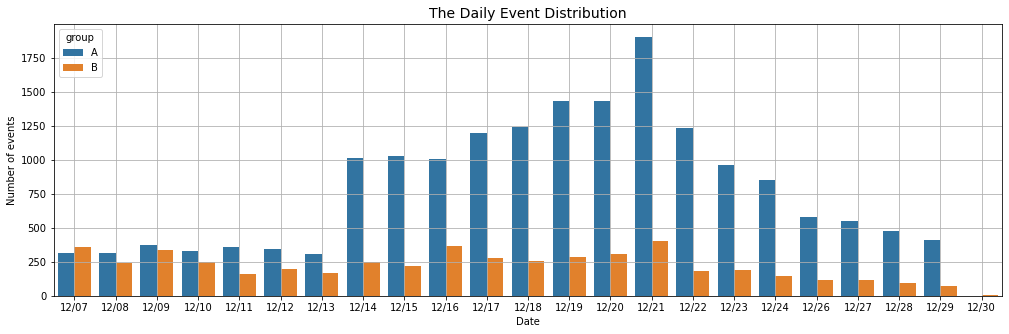

In [203]:
# the updated cell:
from matplotlib import pyplot as plt
import seaborn as sns

plot = (ab_new_participants_events_df.groupby(['event_date','group']).agg({'user_id': 'count'}).reset_index())
plot['event_date'] = pd.to_datetime(plot['event_date']).dt.strftime('%m/%d')
plt.figure(figsize=(17, 5))
sns.barplot(x='event_date', y='user_id', hue='group', data=plot)
plt.title('The Daily Event Distribution', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.grid()
plt.show()

plt.show()

<b>Comparing the funnel in both the groups

In [204]:
#event funnel for group A
event_funnel_A = ab_group_A.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_dt',
    aggfunc='min').reset_index().rename_axis(index=None, columns=None)
event_funnel_A.head()

,user_id,login,product_cart,product_page,purchase
0,0010A1C096941592,2020-12-17 21:07:27,NaN,2020-12-17 21:07:27,2020-12-17 21:07:27
1,00341D8401F0F665,2020-12-21 11:14:50,NaN,NaN,NaN
2,003DF44D7589BBD4,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaN
3,00505E15A9D81546,2020-12-14 17:28:32,NaN,NaN,NaN
4,006E3E4E232CE760,2020-12-17 16:40:41,NaN,2020-12-17 16:40:42,NaN


In [205]:
step_1 = ~event_funnel_A['login'].isna()
step_2 = step_1 & (event_funnel_A['product_page'] > event_funnel_A['login'])
step_3 = step_2 & (event_funnel_A['product_cart'] > event_funnel_A['product_page'])
step_4 = step_3 & (event_funnel_A['purchase'] > event_funnel_A['product_cart'])

n_login_a=event_funnel_A[step_1].shape[0]
n_product_page_a = event_funnel_A[step_2].shape[0]
n_product_cart_a = event_funnel_A[step_3].shape[0]
n_purchase_a = event_funnel_A[step_4].shape[0]

print('Number of users visiting logged in - Group A: ', n_login_a)
print('Number of users visiting product page - Group A:', n_product_page_a)
print('number of users adding product to cart - Group A:', n_product_cart_a)
print('number of users Purchasing - Group A:', n_purchase_a) 

Number of users visiting logged in - Group A:  2604
Number of users visiting product page - Group A: 959
number of users adding product to cart - Group A: 49
number of users Purchasing - Group A: 0


In [206]:
#conversion from login to purchase
step_5=step_1 & (event_funnel_A['purchase'] >= event_funnel_A['login'])
n_purchase_nocart_a=event_funnel_A[step_5].shape[0]
print('number of users Purchasing without cart- Group A:', n_purchase_nocart_a) 

number of users Purchasing without cart- Group A: 833


In [207]:
login_product_conversion_a = (n_product_page_a/ n_login_a)*100
product_cart_conversion_a = (n_product_cart_a / n_product_page_a)*100
cart_purchase_conversion_a = (n_purchase_a / n_product_cart_a)*100
login_purchase_conversion_a=(n_purchase_nocart_a / n_login_a)*100

In [208]:
login_product_conversion_a


36.82795698924731

In [209]:
product_cart_conversion_a


5.109489051094891

In [210]:
cart_purchase_conversion_a

0.0

In [211]:
login_purchase_conversion_a

31.989247311827956

In [212]:
#event funnel for group B
event_funnel_B = ab_group_B.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_dt',
    aggfunc='min').reset_index().rename_axis(index=None, columns=None)
event_funnel_B.head()

,user_id,login,product_cart,product_page,purchase
0,001064FEAAB631A1,2020-12-20 14:43:27,NaN,2020-12-20 14:43:28,NaN
1,005E096DBD379BCF,2020-12-21 07:20:39,NaN,NaN,2020-12-21 07:20:39
2,015D1E3BB893349D,2020-12-16 21:14:05,NaN,2020-12-16 21:14:06,NaN
3,015FF3EC72C1F4F6,2020-12-20 08:29:30,NaN,2020-12-20 08:29:31,NaN
4,01B0B891CA513468,2020-12-16 22:35:11,2020-12-16 22:35:11,2020-12-16 22:35:11,NaN


In [213]:
step_1 = ~event_funnel_B['login'].isna()
step_2 = step_1 & (event_funnel_B['product_page'] > event_funnel_B['login'])
step_3 = step_2 & (event_funnel_B['product_cart'] > event_funnel_B['product_page'])
step_4 = step_3 & (event_funnel_B['purchase'] > event_funnel_B['product_cart'])

n_login_b=event_funnel_B[step_1].shape[0]
n_product_page_b = event_funnel_B[step_2].shape[0]
n_product_cart_b = event_funnel_B[step_3].shape[0]
n_purchase_b = event_funnel_B[step_4].shape[0]

print('Number of users visiting logged in - Group B: ', n_login_b)
print('Number of users visiting product page - Group B:', n_product_page_b)
print('number of users adding product to cart - Group B:', n_product_cart_b)
print('number of users Purchasing - Group B:', n_purchase_b) 

Number of users visiting logged in - Group B:  876
Number of users visiting product page - Group B: 264
number of users adding product to cart - Group B: 23
number of users Purchasing - Group B: 1


In [214]:
#conversion of login to purchase in group B
step_5=step_1 & (event_funnel_B['purchase'] >= event_funnel_B['login'])
n_purchase_nocart_b=event_funnel_B[step_5].shape[0]
print('number of users Purchasing without cart- Group B:', n_purchase_nocart_b) 

number of users Purchasing without cart- Group B: 241


In [215]:
login_product_conversion_b = (n_product_page_b/ n_login_b)*100
product_cart_conversion_b = (n_product_cart_b / n_product_page_b)*100
cart_purchase_conversion_b = (n_purchase_b / n_product_cart_b)*100
login_purchase_conversion_b=(n_purchase_nocart_b / n_login_b)*100

In [216]:
login_product_conversion_b 

30.136986301369863

product_cart_conversion_b 

In [217]:
cart_purchase_conversion_b 

4.3478260869565215

In [218]:
login_purchase_conversion_b

27.51141552511416

<b>Intermediate Conclusion:  
    There are many instances of 'purchase' made right after login page.  
Maintaining the sequence of the funnel product_page → product_card → purchase, didn't end up in more purchase.   
So , we also compared the funnel of login → purchase .

<b>Comparing the event funnel of login and purchase , we see that GroupA has around 31% and GroupB has 27% conversion from  
    'login' to 'purchase' with some difference in case of purchase and Group B on lower side.

<b>Data to consider with A/B test results.  
1.We have less than expected number of audience.  
2.Number of participants in each group is significantly different.  
3.Two more days left to finish A/B test and there is a promo running currently for a week.

In [219]:
ab_new_participants_events_df

,Unnamed: 0_x,user_id,event_dt,event_name,details,event_date,Unnamed: 0_y,group,ab_test
0,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,359,A,recommender_system_test
1,3382,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,359,A,recommender_system_test
2,60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,359,A,recommender_system_test
3,61897,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,359,A,recommender_system_test
4,63642,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,359,A,recommender_system_test
...,...,...,...,...,...,...,...,...,...
22669,410757,1484BBF124DB1B18,2020-12-27 10:53:34,login,0.00,2020-12-27,1659,A,recommender_system_test
22670,363934,BEF16764A13AEC34,2020-12-21 03:49:49,login,0.00,2020-12-21,550,B,recommender_system_test
22671,374904,BEF16764A13AEC34,2020-12-22 18:52:25,login,0.00,2020-12-22,550,B,recommender_system_test
22672,397105,BEF16764A13AEC34,2020-12-24 22:11:00,login,0.00,2020-12-24,550,B,recommender_system_test


In [220]:
# the update cell:
import plotly.graph_objects as go

tmp_funnel = ab_new_participants_events_df.groupby(['group','event_name']).agg({'user_id':'nunique'}).reset_index()
tmp_funnel = tmp_funnel.reindex([0,2,1,3,4,6,5,7])

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'Group A',
    y = tmp_funnel.query('group == "A"')['event_name'],
    x = tmp_funnel.query('group == "A"')['user_id'],
    marker = {"color": "#3274a1"},
    textinfo = "value+percent initial+percent previous"))
fig.add_trace(go.Funnel(
    name = 'Group B',
    y = tmp_funnel.query('group == "B"')['event_name'],
    x = tmp_funnel.query('group == "B"')['user_id'],
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(
    title={ 'text': "The Simple Product Funnel"},
)

fig.show()

# Statistical Data Analysis:

<b>1.Conversion into each stage of the funnel - (login → product_page)

<b>H0 : There is no difference between the proportions of product_page and login page  
H1 : There is difference between the proportions of product_page and login page

In [221]:
alpha = .05 # significance level

successes = np.array([n_product_page_a,n_product_page_b])
trials = np.array([n_login_a,n_login_b])

# success proportion in the first group:
p1 = successes[0]/trials[0]

# success proportion in the second group:
p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
difference = p1 - p2 

In [222]:
# calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

p-value:  0.0003330148063960259
Rejecting the null hypothesis: there is a significant difference between the proportions


<b>2.conversion into each stage of the funnel - (product_page → product_cart page)

<b>H0 : There is no difference between the proportions of product_page and product_cart page  
H1 : There is difference between the proportions of product_page and product_cart page

In [223]:
alpha = .05 # significance level

successes = np.array([n_product_cart_a,n_product_cart_b])
trials = np.array([n_product_page_a,n_product_page_b])

# success proportion in the first group:
p1 = successes[0]/trials[0]

# success proportion in the second group:
p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
difference = p1 - p2 

In [224]:
# calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

p-value:  0.027657002837023992
Rejecting the null hypothesis: there is a significant difference between the proportions


<b>3.conversion into each stage of the funnel -(product_cart → purchase page  )

<b>H0 : There is no difference between the proportions of product_cart and purchase page  
H1 : There is difference between the proportions of product_cart and purchase page  

In [225]:
alpha = .05 # significance level

successes = np.array([n_purchase_a,n_purchase_b])
trials = np.array([n_product_cart_a,n_product_cart_b])

# success proportion in the first group:
p1 = successes[0]/trials[0]

# success proportion in the second group:
p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
difference = p1 - p2 

In [226]:
# calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

p-value:  0.14160405331453174
Failed to reject the null hypothesis: there is no reason to consider the proportions different


<b>4.conversion directly from login stage to purchase of the funnel -(login  →  purchase)

<b>H0 : There is no difference between the proportions of login and purchase  
H1 : There is difference between the proportions of login and purchase

In [227]:
alpha = .05 # significance level

successes = np.array([n_purchase_a,n_purchase_b])
trials = np.array([n_login_a,n_login_b])

# success proportion in the first group:
p1 = successes[0]/trials[0]

# success proportion in the second group:
p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
difference = p1 - p2 

In [228]:
# calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

p-value:  0.08464079332340213
Failed to reject the null hypothesis: there is no reason to consider the proportions different


<b>Conclusion:  
   Based on statistical analysis of conversion to each stage of the funnel , we see that  
   1.There is significant difference in proportions for product_page and product_cart page.  
   2.The proportion of purchase from product_page as well as from login page are not different ie we don't see  
     a significant difference in conversion rate (purchase in both the groups).

## Final Conclusion.  
<b>EDA findings:  
1.Maintaining the sequence of the funnel product_page → product_card → purchase, didn't end up in more purchase.
So , we also compared the funnel of login → purchase .  
2.Comparing the event funnel of login and purchase , we see that GroupA has around 31% and GroupB has 27% conversion from 'login' to purchase' which is on the lower side .  
    
<b>A/B test result analysis.  
 1.Statistical result analysis of A/B test shows that there is so significant difference in proportions of the 2 groups on  
 the basis of login → purchase conversion.  
 
 <b>Since A/B test not completed fully and considering some data points like 
    1.We have less than expected number of audience.
    2.Number of participants in each group is significantly different.  
    3.Two more days left to finish A/B test and there is a promo running currently for a week.
     
  We do see a possibility for changes(improvements) in purchase conversion in Group B
     